In [0]:
!pip install PyDrive


    100% |████████████████████████████████| 993kB 7.6MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np


ModuleNotFoundError: ignored

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

NameError: ignored

In [0]:
# Import the corpus data

from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pickle 

proj_dir = '/content/drive/My Drive/accent-classification-corpora/'

In [0]:
!ls "/content/drive/My Drive/accent-classification-corpora"

librispeech_path = '/content/drive/My Drive/accent-classification-corpora/librispeech'
librispeech_preprocessed_path = '/content/drive/My Drive/accent-classification-corpora/librispeech_preprocessed'
librit_path = '/content/drive/My Drive/accent-classification-corpora/librit'
librit_preprocessed_path = '/content/drive/My Drive/accent-classification-corpora/librit_preprocessed'



flat_formants.pickle		   librit_formants
flat_mfcc.pickle		   librit_mfcc
librispeech			   librit_preprocessed
librispeech_formants		   librit_spectrogram_newpickle
librispeech_mfcc		   logging
librispeech_preprocessed	   mfcc_rnn.h5
librispeech_spectrogram_newpickle  seq_formants.pickle
librit				   seq_mfcc.pickle


In [0]:
# Load the MFCC data
librispeech_mfcc_path = '/content/drive/My Drive/accent-classification-corpora/librispeech_mfcc'
librit_mfcc_path = '/content/drive/My Drive/accent-classification-corpora/librit_mfcc'

librispeech_mfcc_data = []
for i, filename in enumerate(os.listdir(librispeech_mfcc_path)):
  if not filename.endswith('.txt'):
    continue # Skip the DS Store file
    
  file_path = os.path.join(librispeech_mfcc_path, filename)
  with open(file_path, 'rb') as fp:
    mfcc_bin = fp.readlines()
  mfcc_sequence = []
  for line in mfcc_bin:
    mfccs = line.decode().split(',')
    mfccs = np.array([float(x.strip()) for x in mfccs])
    mfcc_sequence.append(mfccs)
  mfcc_sequence = np.array(mfcc_sequence)
  
  # Debug - delete files found here;
  # they have short sequences!
  if mfcc_sequence.shape[0] != 1999:
    print(filename)
    
  librispeech_mfcc_data.append(mfcc_sequence)
  
librispeech_mfcc_targets = np.zeros(len(librispeech_mfcc_data))
librispeech_mfcc_data = np.array(librispeech_mfcc_data)

#print(librispeech_mfcc_data[:2])
#print(librispeech_mfcc_data.shape)


[[[  8.79230603 -10.74250521  -1.35272022 ...  -0.55361706   3.65249517
    12.3780681 ]
  [  8.86446457  -9.2492255   -3.28450084 ...  -8.90280398  -1.71297948
     5.49893365]
  [  8.90903213  -8.70461856  -4.92324601 ...  -6.89383033  -4.38538407
     5.27335849]
  ...
  [ 17.84171162   9.20065103 -18.227631   ...  -9.50700899 -16.81062172
   -11.4448755 ]
  [ 18.23458672   9.96045548 -21.70324488 ... -11.42189938 -11.59877846
   -15.20932787]
  [ 17.86619491  12.01079376 -22.0034559  ... -10.57652946  -4.61803214
    -7.90193096]]

 [[ 18.95548403 -42.45979765   7.45681037 ...   0.47741849  -3.23331341
    -0.84313617]
  [ 19.09938384 -38.62716266  14.8062991  ...   9.16299518  -3.06664898
    -4.21424858]
  [ 19.26321909 -48.10693724   9.42105374 ...   7.00727643  -0.83128934
    -2.13936014]
  ...
  [ 20.1817867  -41.75285182  19.26479769 ...   5.42800137  -0.27552657
    -0.33413164]
  [ 19.95192169 -43.48070252  17.43922952 ...   2.05315054  -3.37759293
     2.24305647]
  [ 19.

In [0]:
print(librispeech_mfcc_data.shape)
print(librispeech_mfcc_data.ndim)
print(librispeech_mfcc_data[0])
print(librispeech_mfcc_data[0].shape)
print(librispeech_mfcc_data[0][0])
print(librispeech_mfcc_data[0][0].shape)

(679, 1999, 13)
3
[[  8.79230603 -10.74250521  -1.35272022 ...  -0.55361706   3.65249517
   12.3780681 ]
 [  8.86446457  -9.2492255   -3.28450084 ...  -8.90280398  -1.71297948
    5.49893365]
 [  8.90903213  -8.70461856  -4.92324601 ...  -6.89383033  -4.38538407
    5.27335849]
 ...
 [ 17.84171162   9.20065103 -18.227631   ...  -9.50700899 -16.81062172
  -11.4448755 ]
 [ 18.23458672   9.96045548 -21.70324488 ... -11.42189938 -11.59877846
  -15.20932787]
 [ 17.86619491  12.01079376 -22.0034559  ... -10.57652946  -4.61803214
   -7.90193096]]
(1999, 13)
[  8.79230603 -10.74250521  -1.35272022  -4.67053917   6.83096162
   7.28755629  -1.23069903   0.74165262   9.0321223   12.3148517
  -0.55361706   3.65249517  12.3780681 ]
(13,)


In [0]:
librit_mfcc_data = []
for i, filename in enumerate(os.listdir(librit_mfcc_path)):
  if not filename.endswith('.txt'):
    continue # Skip the DS Store file
    
  file_path = os.path.join(librit_mfcc_path, filename)
  with open(file_path, 'rb') as fp:
    mfcc_bin = fp.readlines()
  mfcc_sequence = []
  for line in mfcc_bin:
    mfccs = line.decode().split(',')
    mfccs = np.array([float(x.strip()) for x in mfccs])
    mfcc_sequence.append(mfccs)
  mfcc_sequence = np.array(mfcc_sequence)
  
  # Debug - delete files found here;
  # they have short sequences!
  if mfcc_sequence.shape[0] != 1999:
    print(filename)
    
  librit_mfcc_data.append(mfcc_sequence)
  
librit_mfcc_targets = np.zeros(len(librit_mfcc_data))
librit_mfcc_data = np.array(librit_mfcc_data)

In [0]:
print(librit_mfcc_data.shape)
print(librit_mfcc_data.ndim)
print(librit_mfcc_data[0])
print(librit_mfcc_data[0].shape)
print(librit_mfcc_data[0][0])
print(librit_mfcc_data[0][0].shape)

(1132, 1999, 13)
3
[[ 19.46156842 -13.61323581  -7.29812553 ...  14.641168     3.23881853
  -12.39689347]
 [ 19.53847503 -11.81234798  -3.75293311 ...  10.45527375  -0.8380549
  -17.8914461 ]
 [ 19.48326919  -8.97496395  -2.36564859 ...  12.73798781   6.72846121
  -12.34157617]
 ...
 [ 14.10311261   8.66315305   2.6605261  ...   2.8587954   -7.21318313
   -0.67766367]
 [ 14.21804649   6.79275231  -0.19572357 ...  -1.537312    -5.44987967
   -0.51447891]
 [ 14.31429164   6.03682319  -4.10443018 ...  -4.28329442 -13.50461376
   -2.31157788]]
(1999, 13)
[ 19.46156842 -13.61323581  -7.29812553  20.52609832 -12.34185347
 -57.68552216 -31.02626916  -8.29449625  -3.49638162 -20.11616787
  14.641168     3.23881853 -12.39689347]
(13,)


In [0]:
# Assemble and save a "flat version" and a "sequential version" of the MFCC data
# DO NOT RERUN THIS! JUST PICKLE ONCE.

# Sequential
'''seq_mfcc_data = np.concatenate([librispeech_mfcc_data, librit_mfcc_data], axis=0)
with open(os.path.join(proj_dir, "seq_mfcc.pickle"), 'wb') as jar:
    pickle.dump(seq_mfcc_data, jar, protocol=pickle.HIGHEST_PROTOCOL)'''

In [0]:
# Flattened

'''orig_len = librispeech_mfcc_data[0].shape[0]
orig_mfcc_dim = librispeech_mfcc_data[0].shape[1] # This is always 13
ls_nexamples = librispeech_mfcc_data.shape[0]
flat_ls_mfcc = librispeech_mfcc_data.reshape(ls_nexamples, orig_len*orig_mfcc_dim)

orig_len = librit_mfcc_data[0].shape[0]
orig_mfcc_dim = librit_mfcc_data[0].shape[1] # This is always 13
lb_nexamples = librit_mfcc_data.shape[0]
flat_lb_mfcc = librit_mfcc_data.reshape(lb_nexamples, orig_len*orig_mfcc_dim)

flat_mfcc_data = np.concatenate([flat_ls_mfcc, flat_lb_mfcc], axis=0)
with open(os.path.join(proj_dir, "flat_mfcc.pickle"), 'wb') as jar:
    pickle.dump(flat_mfcc_data, jar, protocol=pickle.HIGHEST_PROTOCOL)'''

# Baseline

A baseline test with the MFCC data.

In [0]:
# Load the flat MFCC data
with open(os.path.join(proj_dir, 'flat_mfcc.pickle'), 'rb') as jar:
  mfcc_data = pickle.load(jar)

# Set up targets
#mfcc_targets = np.concatenate([librispeech_mfcc_targets, librit_mfcc_targets], axis=0)
#mfcc_targets = np.concatenate([np.zeros(librispeech_mfcc_data.shape[0]), np.ones(librit_mfcc_data.shape[0])])
# Magic numbers: 679 ls examples, 1132 librit examples
mfcc_targets = np.concatenate([np.zeros(679), np.ones(1132)])
print(mfcc_data.shape)

(1811, 25987)


In [0]:
# Split into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mfcc_data, mfcc_targets, test_size=0.20, random_state=42)

print(X_train.shape)

(1448, 25987)


In [0]:
# SVM baseline
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

clf.score(X_train, y_train)

1.0

In [0]:
# Test
clf.score(X_test, y_test)

0.6170798898071626

In [0]:
from sklearn.dummy import DummyClassifier

uniform = DummyClassifier(strategy='most_frequent', random_state=42)
uniform.fit(X_train, y_train)

print(uniform.score(X_train, y_train))

print(uniform.score(X_test, y_test))

0.6332872928176796
0.5922865013774105


So the SVM with MFCCs does better than chance!

# RNN



In [0]:
import os 
import numpy as np

# Load sequential data from pickle
with open(os.path.join(proj_dir, 'seq_mfcc.pickle'), 'rb') as jar:
  mfcc_data = pickle.load(jar)

# Set up targets
# Magic numbers: 679 ls examples, 1132 librit examples
mfcc_targets = np.concatenate([np.zeros(679), np.ones(1132)])
print(mfcc_data.shape)

(1811, 1999, 13)


In [0]:
# Split into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mfcc_data, mfcc_targets, test_size=0.20, random_state=42)

print(X_train.shape)

(1448, 1999, 13)


In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test.shape)

(363, 2, 2)


In [0]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, CSVLogger

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))
      

In [0]:
import datetime

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# Set up early stopping callbacks and logging
log_filename = '{date:%Y-%m-%d_%H:%M:%S}.txt'.format(date=datetime.datetime.now())
mfcc_log_path = '/content/drive/My Drive/accent-classification-corpora/logging/mfcc/'
log_path = os.path.join(mfcc_log_path, log_filename)

num_lstm_units = 350
num_epochs = 10
batch_size = 50

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath=os.path.join(proj_dir, 'mfcc_rnn.h5'), monitor='val_loss', save_best_only=True),
             CSVLogger(log_path)]

# Structure the network
model = Sequential()
model.add(LSTM(num_lstm_units, input_shape=(1999, 13)))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.10, shuffle=True, callbacks=callbacks)



Train on 1303 samples, validate on 145 samples
Epoch 1/10
1303/1303 [==============================] - 157s 120ms/step - loss: 0.5974 - acc: 0.6746 - val_loss: 0.4981 - val_acc: 0.7241
Epoch 2/10
1303/1303 [==============================] - 156s 120ms/step - loss: 0.3367 - acc: 0.8672 - val_loss: 0.4456 - val_acc: 0.7724
Epoch 3/10
1303/1303 [==============================] - 155s 119ms/step - loss: 0.2023 - acc: 0.9271 - val_loss: 0.4072 - val_acc: 0.8207
Epoch 4/10
1303/1303 [==============================] - 155s 119ms/step - loss: 0.0939 - acc: 0.9816 - val_loss: 0.3897 - val_acc: 0.8345
Epoch 5/10
1303/1303 [==============================] - 154s 118ms/step - loss: 0.0733 - acc: 0.9816 - val_loss: 0.3490 - val_acc: 0.8690
Epoch 6/10
1303/1303 [==============================] - 155s 119ms/step - loss: 0.0695 - acc: 0.9816 - val_loss: 0.2668 - val_acc: 0.8897
Epoch 7/10
1303/1303 [==============================] - 154s 118ms/step - loss: 0.0158 - acc: 0.9977 - val_loss: 0.1713 - val

In [0]:
from keras.models import load_model

#model.fit(X_train, y_train, epochs=2, batch_size=64,verbose=1, validation_split=0.10, shuffle =True)
model = load_model(os.path.join(proj_dir, 'mfcc_rnn.h5'))
print (model.summary())
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print ("Accuracy: %.2f%%" % (scores[1]*100))

# Append to log
line = 'num_lstm_units: {} \n num_epochs: {} \n batch_size: {}'.format(num_lstm_units, num_epochs, batch_size)
with open(log_path, 'a') as fp:
  fp.write('\n')
  fp.write(line)
  fp.write('\n')
  fp.write("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 350)               509600    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 702       
Total params: 510,302
Trainable params: 510,302
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 95.32%


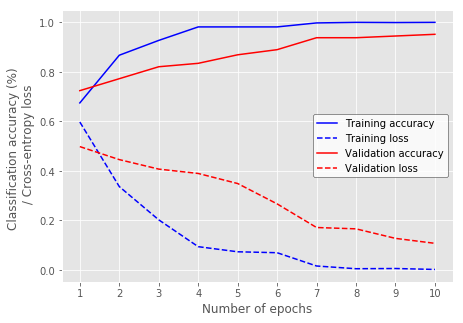

In [0]:
# Get plot of learning curves for best run
import os
mfcc_log_path = '/content/drive/My Drive/accent-classification-corpora/logging/mfcc/'

# Best run for the MFCC RNN is: 2018-11-23_16:04:53.txt

log_path = os.path.join(mfcc_log_path, '2018-11-23_16:04:53.txt')
with open(log_path, 'r') as fp:
  lines = fp.readlines()

# Just get the train/valid acc lines, not the hyperparam info at the bottom of the log  
lines = lines[:-5]

train_loss, train_acc = [], []
valid_loss, valid_acc = [], []
epochs = range(1, len(lines))
for line in lines[1:]: # Skip the first header line
  split_line = line.split(',')
  train_acc.append(float(split_line[1]))
  train_loss.append(float(split_line[2]))
  valid_acc.append(float(split_line[3]))
  valid_loss.append(float(split_line[4])) 
  
# Now plot
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (7,5)

plt.plot(epochs, train_acc, color='blue', linestyle='solid', label='Training accuracy')
plt.plot(epochs, train_loss, color='blue', linestyle='dashed', label='Training loss')

plt.plot(epochs, valid_acc, color='red', linestyle='solid', label='Validation accuracy')
plt.plot(epochs, valid_loss, color='red', linestyle='dashed', label='Validation loss')

plt.xlabel('Number of epochs')
plt.xticks(epochs)

plt.ylabel('Classification accuracy (%) \n / Cross-entropy loss')

legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

plt.show()